In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np

# Clustering and Dimentionnality Reduction

<div class="alert alert-block alert-danger">

1. Import the CIFAR-10 dataset using the following code and create a new dataset containing only the following classes: "airplane," "automobile," "bird," and "cat."

<div/>

<div class="alert alert-block alert-warning">The CIFAR-10 dataset is composed of 60000 RGB images( 32x32 pixels), categorized into 10 classes with 6000 images per class. It is divided into 50000 training images and 10000 test images.
<div/>

In [66]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
label_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
# summarize loaded dataset
print('train: X=%s, y=%s' % (x_train.shape, y_train.shape))

train: X=(50000, 32, 32, 3), y=(50000, 1)


In [67]:
print('test: X=%s, y=%s' % (x_test.shape, y_test.shape))

test: X=(10000, 32, 32, 3), y=(10000, 1)


<div class="alert alert-block alert-danger">

2. Visualize some samples from the dataset with their corresponding labels.

<div/>

In [68]:
target_classes = ['airplane', 'automobile', 'bird', 'cat']
target_indices = [label_names.index(cls) for cls in target_classes]

train_mask = np.isin(y_train, target_indices).flatten()
x_train_filtered = x_train[train_mask]
y_train_filtered = y_train[train_mask]

test_mask = np.isin(y_test, target_indices).flatten()
x_test_filtered = x_test[test_mask]
y_test_filtered = y_test[test_mask]

new_label_mapping = {index: i for i, index in enumerate(target_indices)}
y_train_filtered = np.vectorize(new_label_mapping.get)(y_train_filtered)
y_test_filtered = np.vectorize(new_label_mapping.get)(y_test_filtered)

In [69]:
def visualize_samples(images, labels, class_names, num_samples=16):
    plt.figure(figsize=(10, 10))
    indices = np.random.choice(range(len(images)), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[idx])
        plt.title(class_names[labels[idx][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

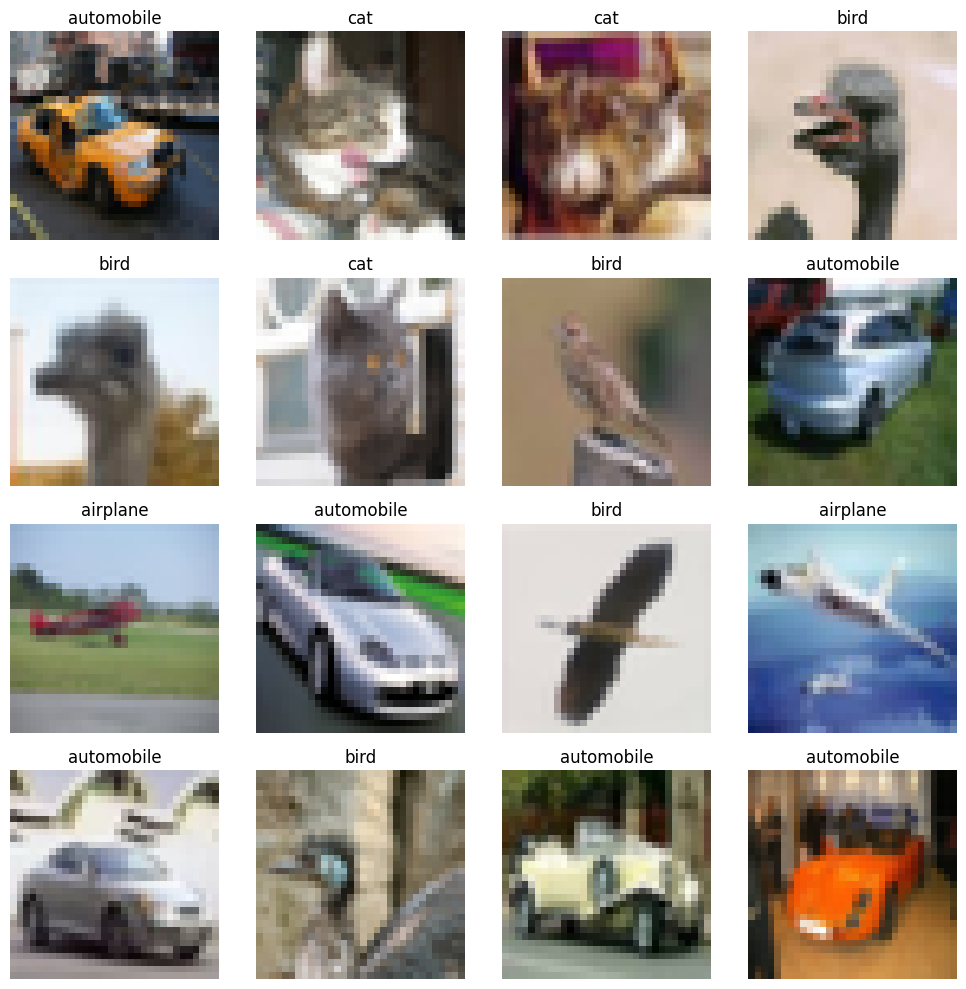

In [70]:
visualize_samples(x_train_filtered, y_train_filtered, target_classes)

<div class="alert alert-block alert-danger">

3. Normalize the training data by dividing all values by 255.

<div/>

In [71]:
print(f"min pixel value: {x_train_filtered.min()}")
print(f"max pixel value: {x_train_filtered.max()}")

min pixel value: 0
max pixel value: 255


In [72]:
x_train_filtered = x_train_filtered.astype('float32') / 255.0
x_test_filtered = x_test_filtered.astype('float32') / 255.0

print(f"min pixel value: {x_train_filtered.min()}")
print(f"max pixel value: {x_train_filtered.max()}")

min pixel value: 0.0
max pixel value: 1.0


<div class="alert alert-block alert-danger">

4. Visualize the data using a 2D plot by applying dimensionality reduction based on PCA with two components.

<div/>

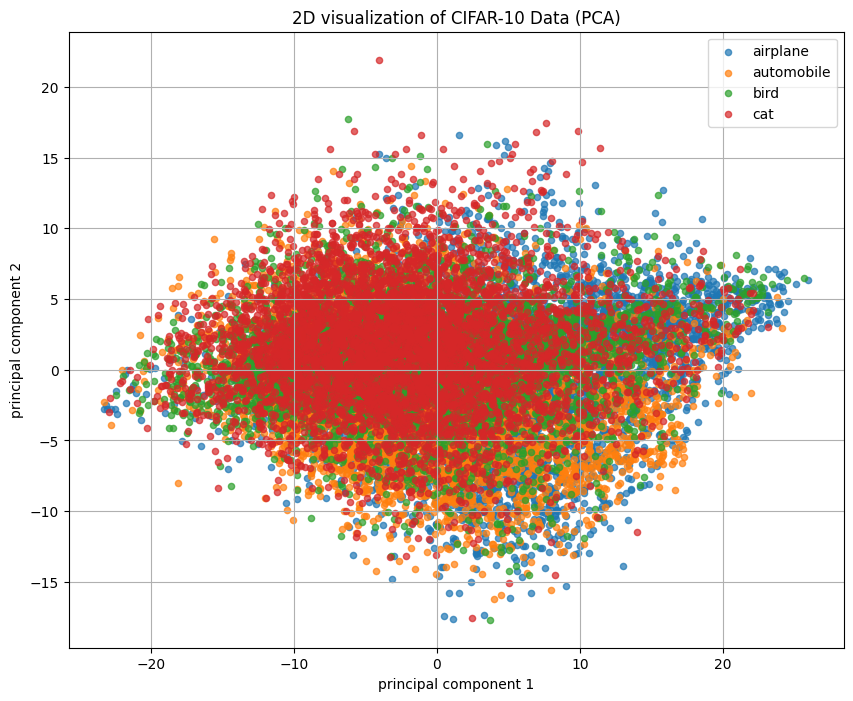

In [73]:
# PCA principal component analysis

# flatten the image data
x_train_flattened = x_train_filtered.reshape(x_train_filtered.shape[0], -1)

# apply PCA to reduce to 2 components
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_flattened)
x_test_pca = pca.transform(x_test_flattened)

# 2D scatter plot
plt.figure(figsize=(10, 8))
palette = sns.color_palette("hsv", len(target_classes))
for label in np.unique(y_train_filtered):
    idx = y_train_filtered.flatten() == label
    plt.scatter(
        x_train_pca[idx, 0], x_train_pca[idx, 1],
        label=target_classes[label],
        alpha=0.7,
        s=20
    )
plt.legend()
plt.title("2D visualization of CIFAR-10 Data (PCA)")
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.grid(True)
plt.show()


<div class="alert alert-block alert-danger">

5. Apply the K-means algorithm, K-means with PCA (with a variance of 95%), and K-means with LDA (3 components) on the normalized training data.

<div/>

In [74]:
x_train_flattened = x_train_filtered.reshape(x_train_filtered.shape[0], -1)
x_test_flattened = x_test_filtered.reshape(x_test_filtered.shape[0], -1)

x_train_flattened[0].shape

(3072,)

In [75]:
# k-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_train_flattened)

train_labels_kmeans = kmeans.predict(x_train_flattened)
test_labels_kmeans = kmeans.predict(x_test_flattened)

In [76]:
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_flattened)
x_test_pca = pca.transform(x_test_flattened)

kmeans_pca = KMeans(n_clusters=4, random_state=42)
kmeans_pca.fit(x_train_pca)

train_labels_kmeans_pca = kmeans_pca.predict(x_train_pca)
test_labels_kmeans_pca = kmeans_pca.predict(x_test_pca)

In [77]:
# LDA linear discriminant analysis
lda = LinearDiscriminantAnalysis(n_components=3)
x_train_lda = lda.fit_transform(x_train_flattened, y_train_filtered.ravel())
x_test_lda = lda.transform(x_test_flattened)

kmeans_lda = KMeans(n_clusters=4, random_state=42)
kmeans_lda.fit(x_train_lda)

train_labels_kmeans_lda = kmeans_lda.predict(x_train_lda)
test_labels_kmeans_lda = kmeans_lda.predict(x_test_lda)

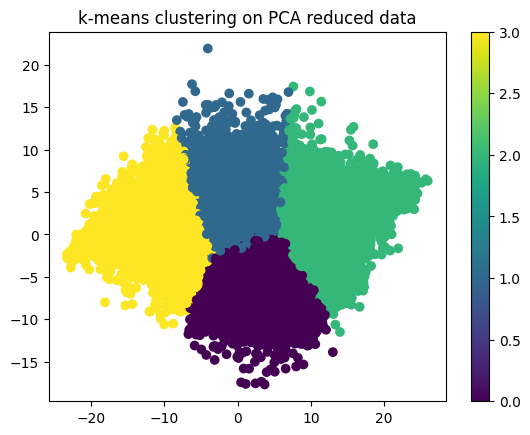

In [78]:
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=train_labels_kmeans_pca, cmap='viridis')
plt.title('k-means clustering on PCA reduced data')
plt.colorbar()
plt.show()


<div class="alert alert-block alert-danger">

6. Visualize the data after clustering using a 2D plot (use PCA with 2 components for dimensionality reduction) for each model. What do you observe?

<div/>

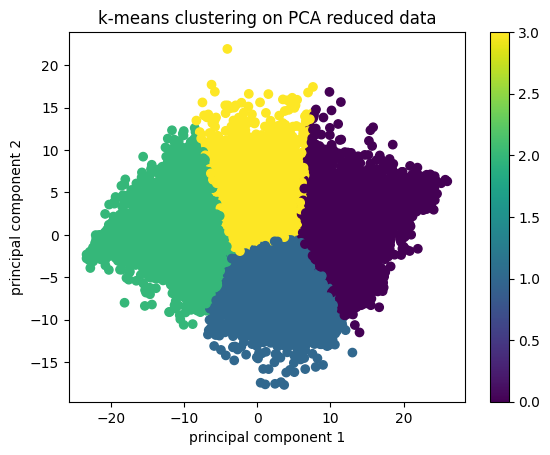

In [79]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_flattened)

train_labels_kmeans = kmeans.fit_predict(x_train_pca)

plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=train_labels_kmeans, cmap='viridis')
plt.title('k-means clustering on PCA reduced data')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.colorbar()
plt.show()

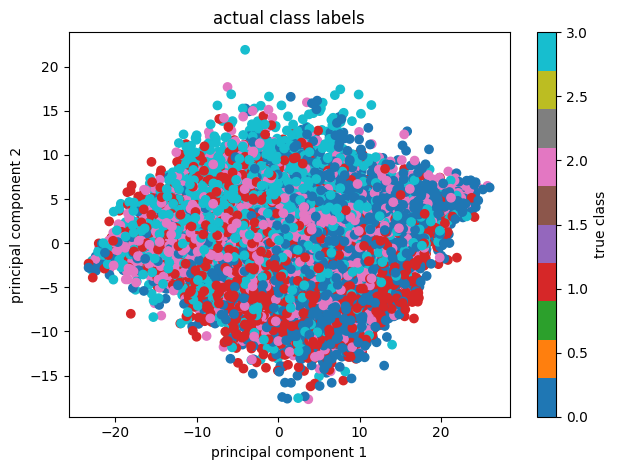

In [80]:
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_filtered, cmap='tab10')
plt.title('actual class labels')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.colorbar(label='true class')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-danger">

7. Compute the Davies-Bouldin score for all generated models.

<div/>

In [81]:
# formule = 1/N * sum(max((Si+Sj)/Dji where i != j))
# N: nbr of clusters
# Dji distance between centroids i and j
# Si = avg distance between all points in cluster i and the centroid cluster i
# formule = 1/|Ci| sum(||x-ci||)
# ci centroid, Ci set of points in the cluster i

kmeans_labels = kmeans.fit_predict(x_train_flattened)
db_score_original = davies_bouldin_score(x_train_flattened, kmeans_labels)

kmeans_pca_labels = kmeans.fit_predict(x_train_pca)
db_score_pca = davies_bouldin_score(x_train_pca, kmeans_pca_labels)

kmeans_lda_labels = kmeans.fit_predict(x_train_lda)
db_score_lda = davies_bouldin_score(x_train_lda, kmeans_lda_labels)

print(f"davies-bouldin score (original k-means): {db_score_original}")
print(f"davies-bouldin score (k-means with PCA): {db_score_pca}")
print(f"davies-bouldin score (k-means with LDA): {db_score_lda}")

davies-bouldin score (original k-means): 2.452368156221779
davies-bouldin score (k-means with PCA): 0.9049082792094651
davies-bouldin score (k-means with LDA): 1.0626524970337448


<div class="alert alert-block alert-danger">

8. Display the confusion matrix and the classification reports for all models. What do you observe?

<div/>

In [84]:
kmeans.fit(x_train_flattened)
y_kmeans = kmeans.labels_

kmeans_pca.fit(x_train_pca)
y_kmeans_pca = kmeans_pca.labels_

kmeans_lda.fit(x_train_lda)
y_kmeans_lda = kmeans_lda.labels_

y_train_subset = y_train[:20000]

def print_metrics(true_labels, predicted_labels, model_name):
    print(f"confusion matrix for {model_name}:")
    cm = confusion_matrix(true_labels, predicted_labels)
    print(cm)
    print(f"\nclassification report for {model_name}:")
    print(classification_report(true_labels, predicted_labels))

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'confusion matrix for {model_name}')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_train)))
    plt.xticks(tick_marks, np.unique(y_train))
    plt.yticks(tick_marks, np.unique(y_train))

    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.tight_layout()
    plt.show()

confusion matrix for original k-means:
[[382 574 606 427   0   0   0   0   0   0]
 [387 547 570 477   0   0   0   0   0   0]
 [388 603 572 479   0   0   0   0   0   0]
 [371 575 631 434   0   0   0   0   0   0]
 [380 580 614 435   0   0   0   0   0   0]
 [373 562 574 416   0   0   0   0   0   0]
 [381 581 600 476   0   0   0   0   0   0]
 [390 581 634 422   0   0   0   0   0   0]
 [396 563 597 456   0   0   0   0   0   0]
 [352 551 605 458   0   0   0   0   0   0]]

classification report for original k-means:
              precision    recall  f1-score   support

           0       0.10      0.19      0.13      1989
           1       0.10      0.28      0.14      1981
           2       0.10      0.28      0.14      2042
           3       0.10      0.22      0.13      2011
           4       0.00      0.00      0.00      2009
           5       0.00      0.00      0.00      1925
           6       0.00      0.00      0.00      2038
           7       0.00      0.00      0.00      202

/home/mina/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mina/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mina/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


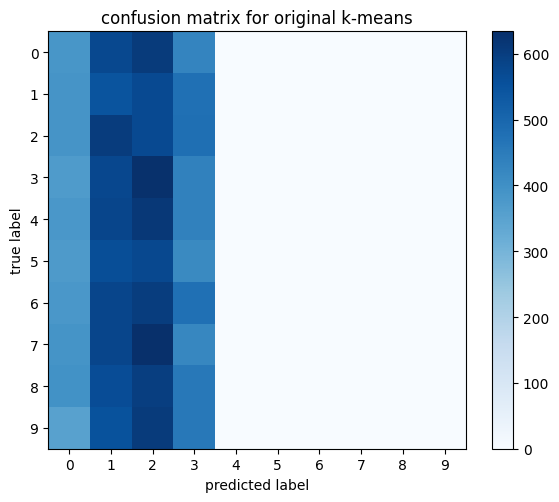

In [87]:
print_metrics(y_train_subset, y_kmeans, "original k-means")
plot_confusion_matrix(confusion_matrix(y_train_subset, y_kmeans), "original k-means")

confusion matrix for k-means with PCA:
[[380 431 589 589   0   0   0   0   0   0]
 [384 475 560 562   0   0   0   0   0   0]
 [389 485 609 559   0   0   0   0   0   0]
 [369 433 586 623   0   0   0   0   0   0]
 [377 441 590 601   0   0   0   0   0   0]
 [377 431 573 544   0   0   0   0   0   0]
 [383 483 590 582   0   0   0   0   0   0]
 [389 424 595 619   0   0   0   0   0   0]
 [394 453 573 592   0   0   0   0   0   0]
 [352 461 564 589   0   0   0   0   0   0]]

classification report for k-means with PCA:
              precision    recall  f1-score   support

           0       0.10      0.19      0.13      1989
           1       0.11      0.24      0.15      1981
           2       0.10      0.30      0.15      2042
           3       0.11      0.31      0.16      2011
           4       0.00      0.00      0.00      2009
           5       0.00      0.00      0.00      1925
           6       0.00      0.00      0.00      2038
           7       0.00      0.00      0.00      202

/home/mina/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mina/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mina/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


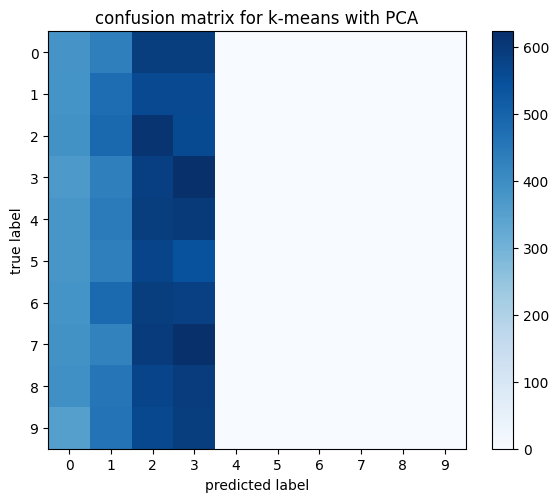

In [88]:
print_metrics(y_train_subset, y_kmeans_pca, "k-means with PCA")
plot_confusion_matrix(confusion_matrix(y_train_subset, y_kmeans_pca), "k-means with PCA")

confusion matrix for k-means with LDA:
[[537 417 565 470   0   0   0   0   0   0]
 [587 445 523 426   0   0   0   0   0   0]
 [542 435 593 472   0   0   0   0   0   0]
 [593 417 568 433   0   0   0   0   0   0]
 [559 449 550 451   0   0   0   0   0   0]
 [528 391 550 456   0   0   0   0   0   0]
 [548 427 580 483   0   0   0   0   0   0]
 [591 434 553 449   0   0   0   0   0   0]
 [566 440 544 462   0   0   0   0   0   0]
 [528 412 588 438   0   0   0   0   0   0]]

classification report for k-means with LDA:
              precision    recall  f1-score   support

           0       0.10      0.27      0.14      1989
           1       0.10      0.22      0.14      1981
           2       0.11      0.29      0.15      2042
           3       0.10      0.22      0.13      2011
           4       0.00      0.00      0.00      2009
           5       0.00      0.00      0.00      1925
           6       0.00      0.00      0.00      2038
           7       0.00      0.00      0.00      202

/home/mina/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mina/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mina/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


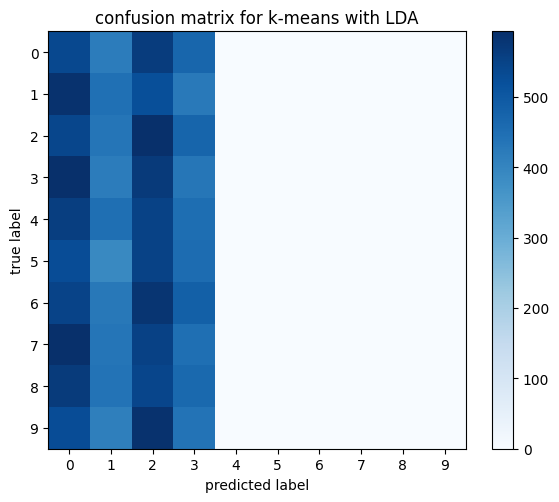

In [89]:
print_metrics(y_train_subset, y_kmeans_lda, "k-means with LDA")
plot_confusion_matrix(confusion_matrix(y_train_subset, y_kmeans_lda), "k-means with LDA")

<div class="alert alert-block alert-danger">

9. Display some misclassifications for the best model (image with the true label and predicted label).

<div/>

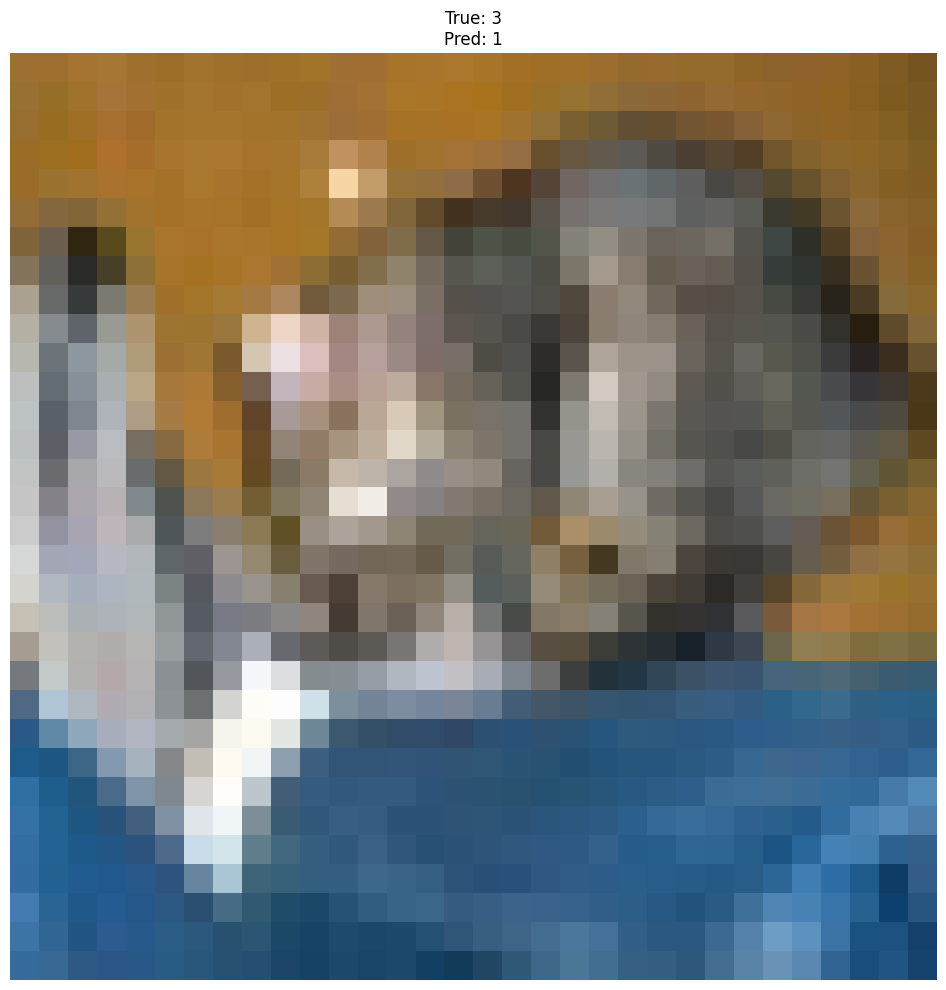

In [97]:
misclassified_indices = np.where(y_kmeans_pca != y_test)[0]


plt.figure(figsize=(10, 10))
idx = misclassified_indices[0]
    
img = x_test[idx].reshape(32, 32, 3)
true_label = y_test[idx][0]
pred_label = y_kmeans_pca[idx]

plt.imshow(img, cmap='gray')
plt.title(f"True: {true_label}\nPred: {pred_label}")
plt.axis('off')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-danger">

10. Try to enhance the performance of the best model.

<div/>

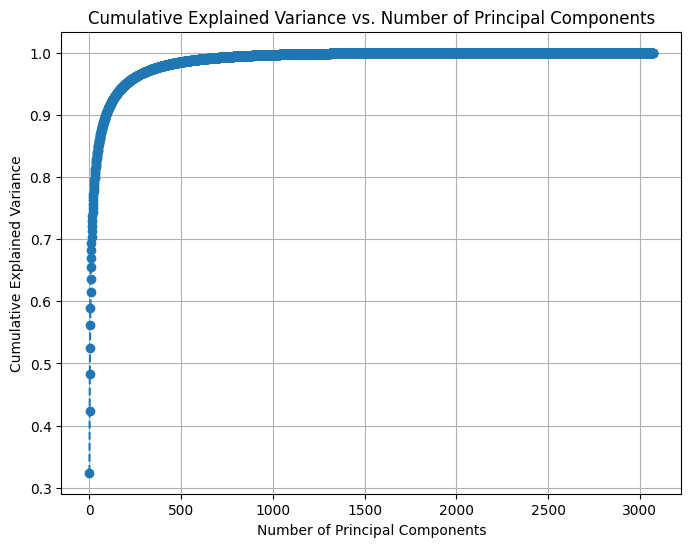

Number of components that explain 95.0% of the variance: 200
Cumulative explained variance with 200 components: 0.9502


In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train_flattened)

# calculate the explained variance and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

def pca_plot(cumulative_explained_variance):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
    plt.title('Cumulative Explained Variance vs. Number of Principal Components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

pca_plot(cumulative_explained_variance)

threshold = 0.95

n_components = np.argmax(cumulative_explained_variance >= threshold) + 1
print(f"Number of components that explain {threshold * 100}% of the variance: {n_components}")

pca_optimal = PCA(n_components=n_components)
x_train_pca = pca_optimal.fit_transform(x_train_flattened)

print(f"Cumulative explained variance with {n_components} components: {cumulative_explained_variance[n_components - 1]:.4f}")

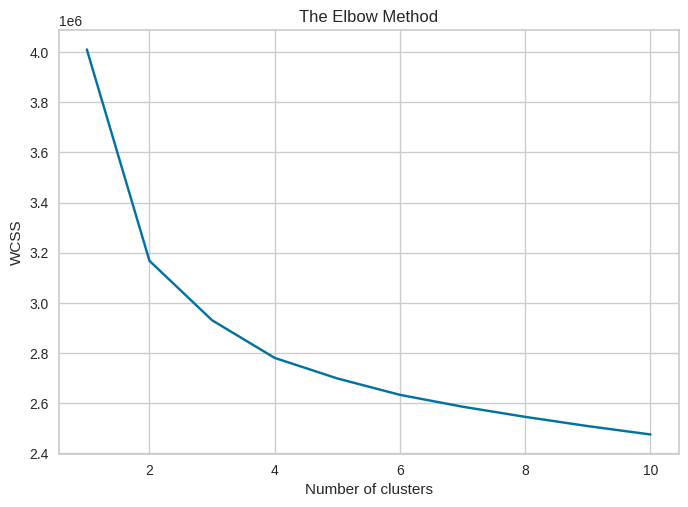

In [119]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_train_flattened) 
    wcss.append(kmeans.inertia_)  

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [120]:
silhouette_score(x_train_flattened, kmeans.labels_)

0.05753916

Silhouette Score: 0.10011796653270721


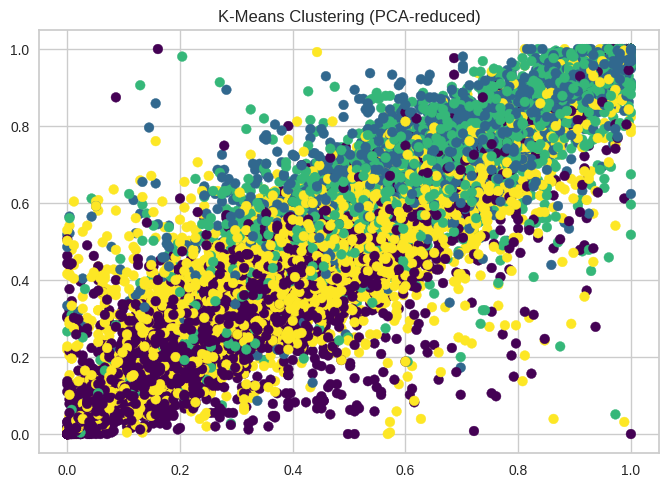

In [121]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=42, max_iter=1000)
kmeans.fit(x_train_flattened)

score = silhouette_score(x_train_flattened, kmeans.labels_)
print(f'Silhouette Score: {score}')

plt.scatter(x_train_flattened[:, 0], x_train_flattened[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clustering (PCA-reduced)')
plt.show()


In [123]:
kmeans_pca_labels = kmeans.fit_predict(x_train_pca)
db_score_pca = davies_bouldin_score(x_train_pca, kmeans_pca_labels)

print(f"davies-bouldin score (k-means with PCA): {db_score_pca}")

davies-bouldin score (k-means with PCA): 2.35712044862914


In [63]:
print(f"y_train shape: {y_train.shape}")
print(f"y_kmeans shape: {y_kmeans.shape}")
print(f"y_kmeans_pca shape: {y_kmeans_pca.shape}")
print(f"y_kmeans_lda shape: {y_kmeans_lda.shape}")


y_train shape: (50000, 1)
y_kmeans shape: (20000,)
y_kmeans_pca shape: (20000,)
y_kmeans_lda shape: (20000,)
